# ML-1 COMPREHENSIVE PROJECT
## Diabetes Prediction Analysis 

#### Problem Statement: 


Diabetes prediction poses significant challenges in the healthcare sector, resulting in substantial health impacts and eroding patient trust.
Imagine you work for HealthSecure, a leading healthcare analytics firm specialising in predictive algorithms. With the rapid increase in digital health data, HealthSecure aims to develop a state-of-the-art system that can predict the onset of diabetes efficiently. Your task is to leverage machine learning to enhance the accuracy and reliability of HealthSecure's diabetes prediction capabilities 


### Objectives:

1. Load and explore the dataset.

2. Check for missing values and handle them appropriately.

3. Perform data visualizations.

4. Scale the data.

5. Implement and evaluate multiple machine learning models.

6. Tune hyperparameters using RandomizedSearchCV.

8. Create a StackingClassifier using KNN and Random Forest models.



#### Step 1: Load the Dataset and Explore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define column names
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [3]:
# Load the dataset
data = pd.read_csv('diabetes.csv', names=column_names)

In [4]:
# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
# Number of features and target distribution
print("\nNumber of features:", data.shape[1] - 1)  # Exclude the target column
print("Target class distribution:\n", data["Outcome"].value_counts())


Number of features: 8
Target class distribution:
 0          500
1          268
Outcome      1
Name: Outcome, dtype: int64


In [6]:
# Check data types
data.dtypes

Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

In [7]:
# Convert all columns to numeric (handle non-numeric values)
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

In [8]:
data.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

#### Step 2: Check for Missing Values

In [9]:
# Check for null values
data.isnull().sum()

Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64

In [10]:
# Replace 0s with NaN for columns where 0 is not meaningful (e.g., Glucose, BloodPressure)
columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[columns_with_zero] = data[columns_with_zero].replace(0, np.nan)

In [11]:
# Check for null values again
data.isnull().sum()

Pregnancies                   1
Glucose                       6
BloodPressure                36
SkinThickness               228
Insulin                     375
BMI                          12
DiabetesPedigreeFunction      1
Age                           1
Outcome                       1
dtype: int64

In [12]:
# Handle missing values (impute with mean)
data.fillna(data.mean(), inplace=True)

In [13]:
# Verify no missing values remain
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Step 3: Visualizations

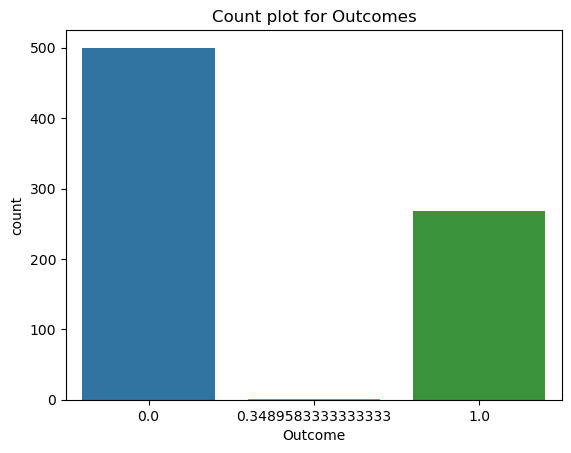

In [14]:
# (a) Count plot for 'Outcome'
sns.countplot(x="Outcome", data=data)
plt.title("Count plot for Outcomes")
plt.show()

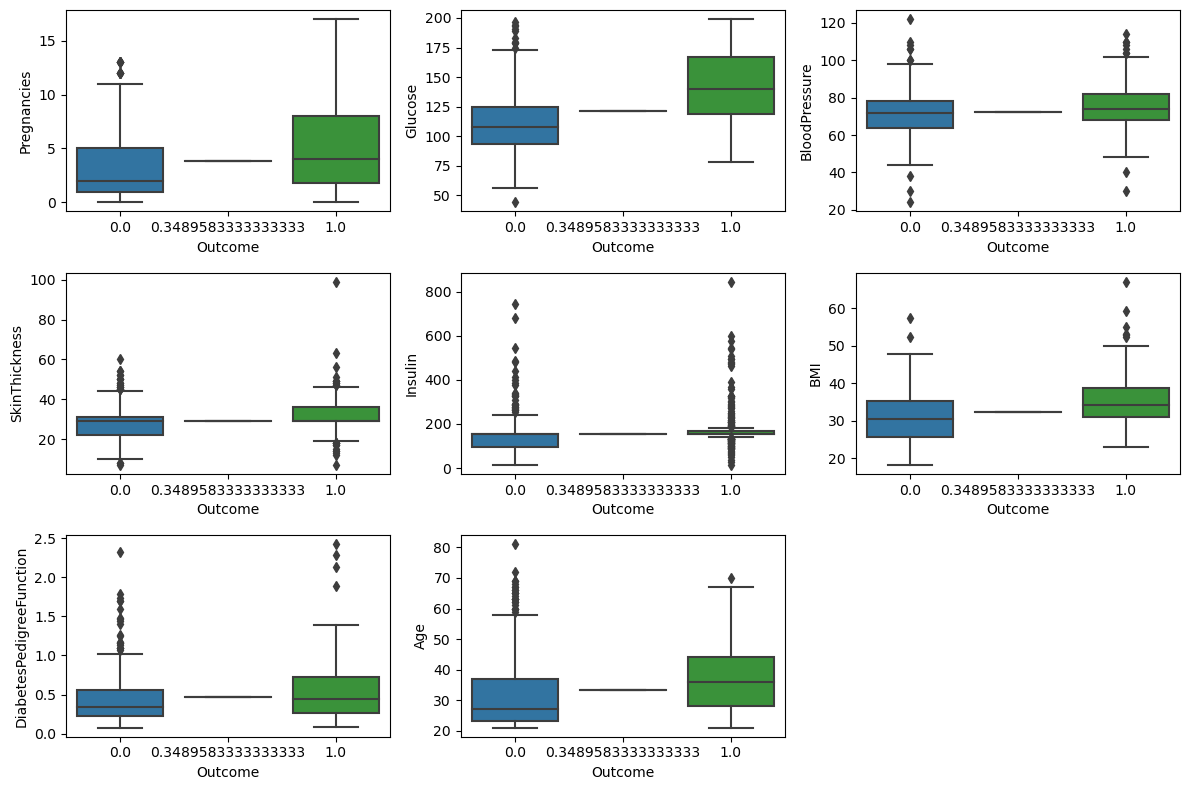

In [15]:
# (b) Boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(column_names[:-1], 1):  # Exclude the target column "Outcome"
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=column, data=data)
plt.tight_layout()
plt.show()

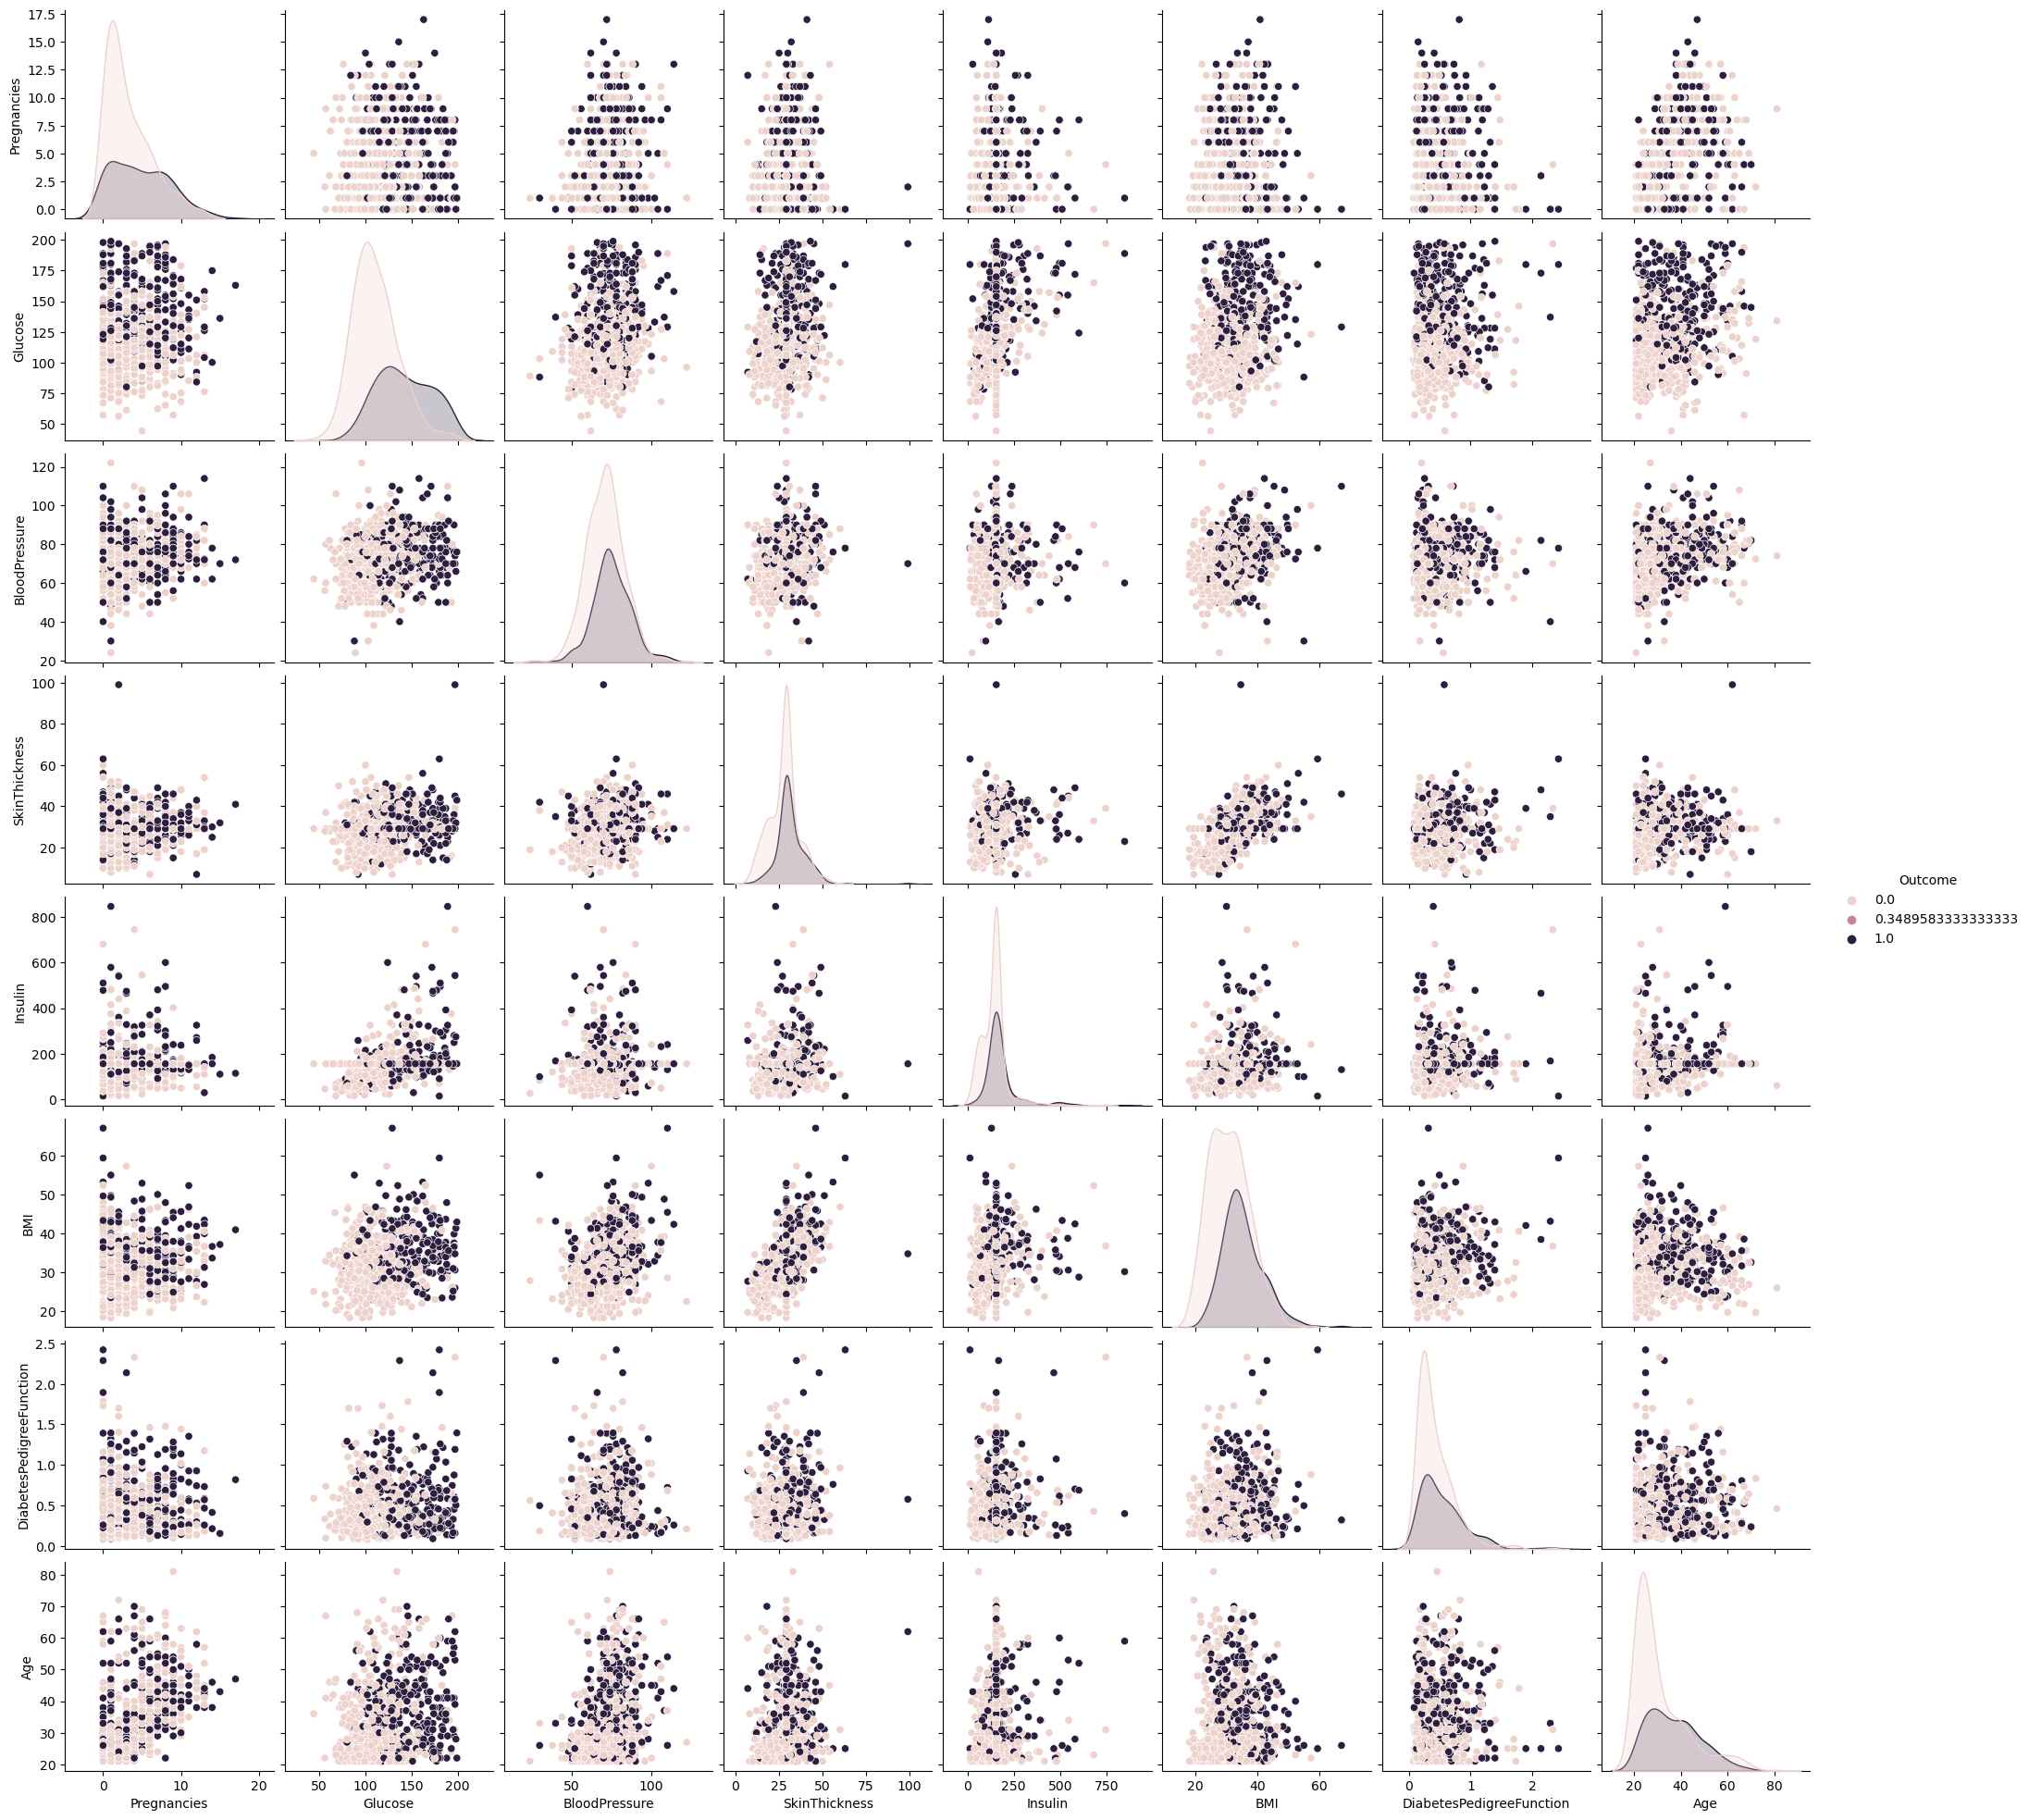

In [16]:
# (c) Pairplot
sns.pairplot(data, hue="Outcome")
plt.show()

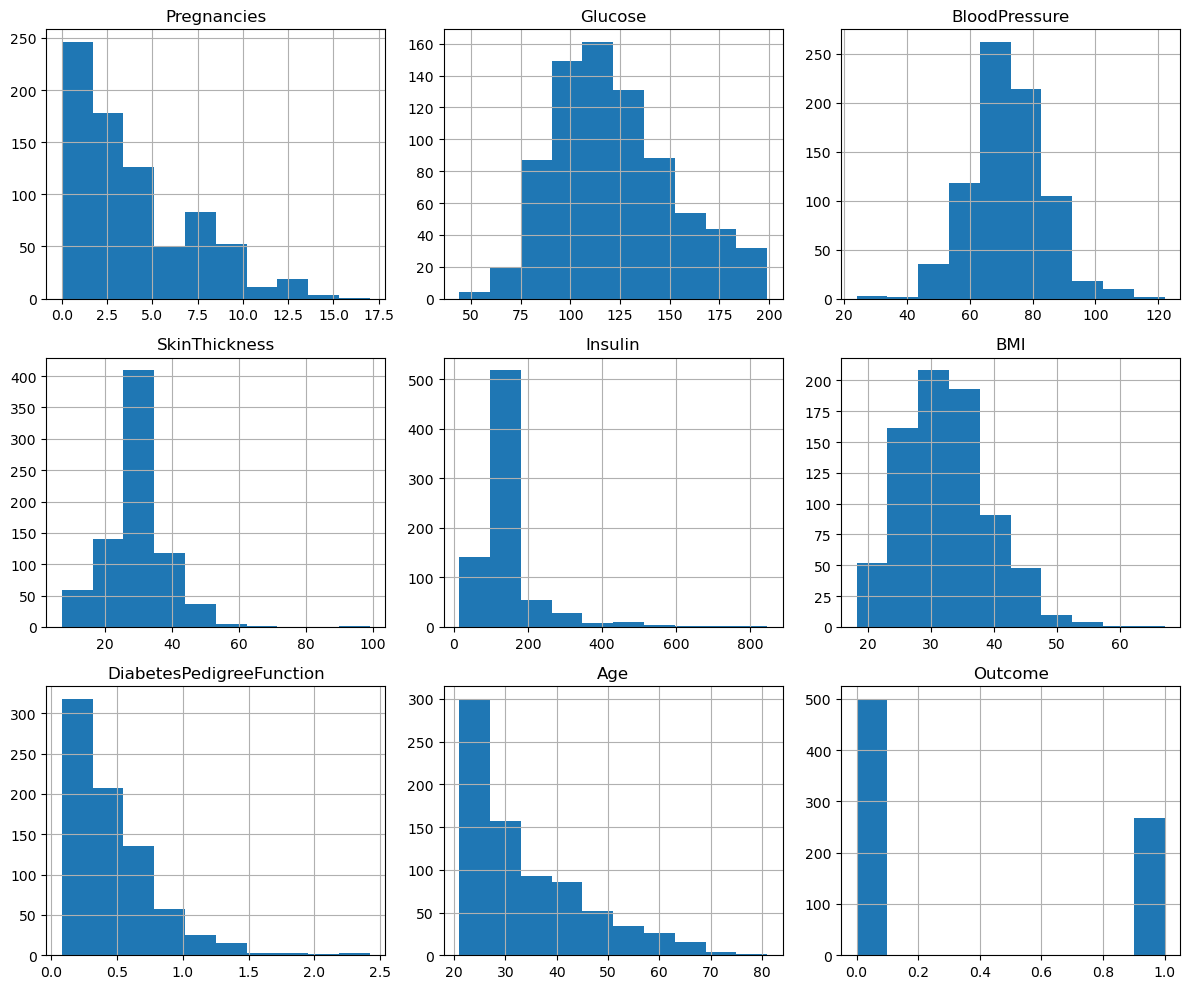

In [17]:
# (d) Histogram for all continuous features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

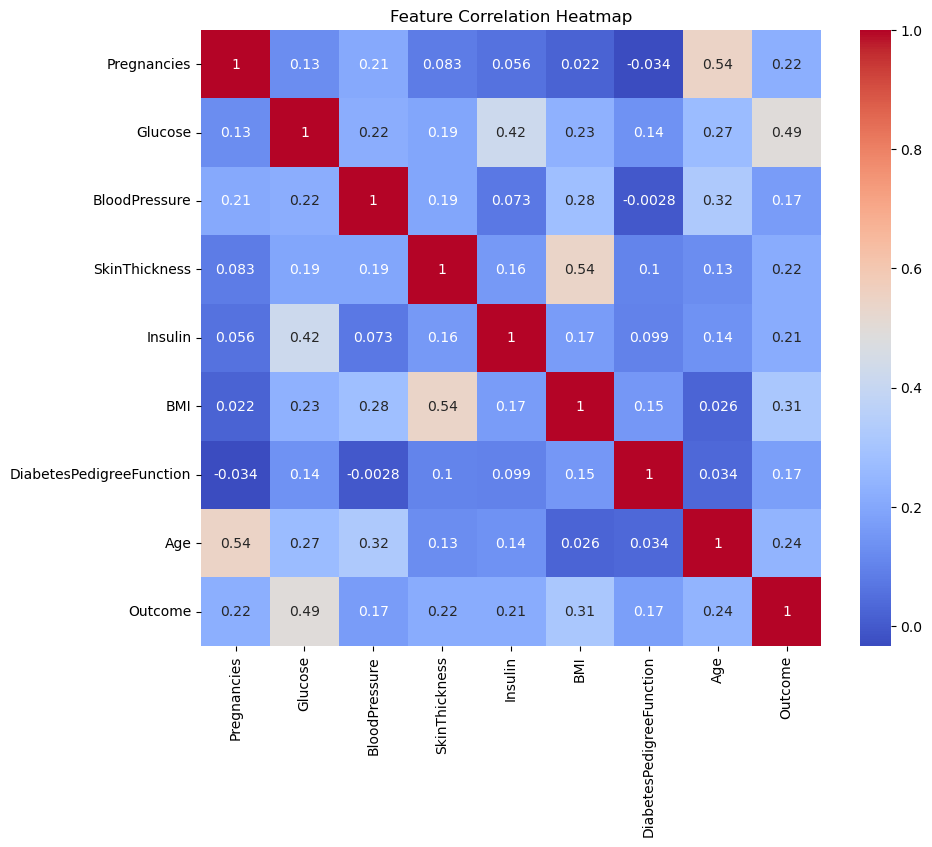

In [18]:
# (e) Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Step 4: Scale the Data and Implement Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Split the data into features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [21]:
# Convert target variable to integer
y = y.astype(int)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [25]:
# Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Logistic Regression Metrics:
Accuracy: 0.7597402597402597
Precision: 0.6904761904761905
Recall: 0.5471698113207547
F1 Score: 0.6105263157894737


#### Step 5: Decision Tree with Hyperparameter Tuning

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Define the Decision Tree model
dt = DecisionTreeClassifier()

In [28]:
# Define hyperparameters for RandomizedSearchCV
params = {
    'max_depth': [3, 5, 10, None],
    'max_features': range(1, 11),
    'min_samples_leaf': range(1, 5),
    'criterion': ['gini', 'entropy']
}

In [29]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=params, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': range(1, 11),
                                        'min_samples_leaf': range(1, 5)},
                   random_state=42)

In [30]:
# Best parameters and model
print("Best Parameters:", random_search.best_params_)
best_dt = random_search.best_estimator_

Best Parameters: {'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 5, 'criterion': 'gini'}


In [31]:
# Evaluate the model
y_pred_dt = best_dt.predict(X_test_scaled)
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.7142857142857143
Precision: 0.5714285714285714
Recall: 0.6792452830188679
F1 Score: 0.6206896551724138


#### Step 6: K-Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

KNN Metrics:
Accuracy: 0.7207792207792207
Precision: 0.5961538461538461
Recall: 0.5849056603773585
F1 Score: 0.5904761904761905


#### Step 7: Random Forest with Hyperparameter Tuning

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Define the Random Forest model
rf = RandomForestClassifier()

In [37]:
# Define hyperparameters for RandomizedSearchCV
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf, param_distributions=params_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [39]:
# Best parameters and model
print("Best Parameters:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}


In [49]:
# Evaluate the model
y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6595744680851063
Recall: 0.5849056603773585
F1 Score: 0.62


#### Step 8: Stacking Classifier (KNN + Random Forest)

In [41]:
!pip install mlxtend
from mlxtend.classifier import StackingClassifier

In [42]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [43]:
# Define base models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [44]:
# Define the StackingClassifier
stack = StackingClassifier(classifiers=[knn, rf], meta_classifier=LogisticRegression())

In [45]:
# Train the StackingClassifier
stack.fit(X_train_scaled, y_train)

StackingClassifier(classifiers=[KNeighborsClassifier(),
                                RandomForestClassifier()],
                   meta_classifier=LogisticRegression())

In [46]:
# Predict and evaluate
y_pred_stack = stack.predict(X_test_scaled)
print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))

Stacking Classifier Metrics:
Accuracy: 0.7337662337662337
Precision: 0.625
Recall: 0.5660377358490566
F1 Score: 0.594059405940594


#### Step 9: Key Insights


## Key Insights from Diabetes Prediction Analysis

### 1. Dataset Overview
- The dataset contains 8 features (e.g., Glucose, BMI, Age, etc.) and 1 target variable (Outcome).
- The target variable is imbalanced:
  - Class 0 (No Diabetes): 500 instances
  - Class 1 (Diabetes): 268 instances
- This imbalance can affect model performance, especially for the minority class (diabetes).

### 2. Missing Values
- Columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI had missing values (represented as 0s).
- Missing values were handled by replacing them with the mean of the respective columns, ensuring no data loss.

### 3. Feature Distributions
- Boxplots revealed significant outliers in features like Insulin and SkinThickness, which could impact model performance.
- Histograms showed that some features (e.g., Age, BMI, Glucose) are not normally distributed, suggesting the need for scaling or transformation.

### 4. Feature Correlations
- The correlation heatmap highlighted strong relationships between certain features:
  - Glucose has a high positive correlation with the target (Outcome), making it a critical feature for prediction.
  - BMI and Age also showed moderate positive correlations with the target.
  - Features like BloodPressure and SkinThickness had weaker correlations with the target.

### 5. Model Performance
#### Logistic Regression
- Accuracy: 75.97%
- Precision: 69.05%
- Recall: 54.72%
- F1 Score: 61.05%
- **Insight**: Performs moderately well but struggles with recall, missing many true positive diabetes cases.

#### Decision Tree (with Hyperparameter Tuning)
- Accuracy: 71.43%
- Precision: 57.14%
- Recall: 67.92%
- F1 Score: 62.07%
- **Insight**: Slightly better recall than Logistic Regression but lower accuracy overall.

#### K-Nearest Neighbors (KNN)
- Accuracy: 72.08%
- Precision: 59.62%
- Recall: 58.49%
- F1 Score: 59.05%
- **Insight**: Performs similarly to Logistic Regression but computationally expensive due to scaling needs.

#### Random Forest (with Hyperparameter Tuning)
- Accuracy: 75.32%
- Precision: 65.96%
- Recall: 58.49%
- F1 Score: 62.00%
- **Insight**: Performs well and balances precision and recall better than simpler models.

#### Stacking Classifier (KNN + Random Forest)
- Accuracy: 73.38%
- Precision: 62.50%
- Recall: 56.60%
- F1 Score: 59.41%
- **Insight**: Shows potential but does not outperform Random Forest significantly.

### 6. Key Takeaways
- **Feature Importance**: Glucose, BMI, and Age are the most important predictors of diabetes.
- **Handling Imbalanced Data**: Techniques like SMOTE or class weighting could improve recall.
- **Model Selection**: Random Forest and Stacking Classifier are among the best-performing models.
- **Hyperparameter Tuning**: Significantly improves performance, especially for Decision Trees and Random Forest.
- **Scalability**: Scaling the data benefits models like Logistic Regression and KNN.

### 7. Recommendations
- **Feature Engineering**: Consider creating new features to capture more complex relationships.
- **Advanced Techniques**: Experiment with Gradient Boosting (XGBoost, LightGBM) or Neural Networks.
- **Deployment**: Random Forest or Stacking Classifier can be deployed for real-time prediction.
- **Data Collection**: Gather more data for the minority class to improve recall.

### Conclusion
- Machine learning models can effectively predict diabetes.
- Ensemble methods like Random Forest and Stacking Classifier achieve competitive results.
- Addressing class imbalance and optimizing hyperparameters could further improve performance.
- This project highlights the potential of predictive analytics in healthcare for early diagnosis and intervention.




### Personal Information
Name = Aman Choudhary

Email = amanchoudhary11189.ac@gmail.com

Linkedin = https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Github = https://github.com/AmanChoudhary1997

Portfolio = https://amanchoudhary1997.github.io/amanchoudhary.github.io/
